# Syed Muhammad Zain Computer Vision Deep Learning Model


## Importing libraries

In [3]:
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import *
from keras.utils import np_utils
from keras.optimizers import Adam
from tqdm import tqdm
import seaborn as sns
import numpy as np
import numpy as np
import pandas as pd
import os
from keras.layers import (Dropout, Input, Dense, Conv2D, 
                          MaxPooling2D, GlobalAveragePooling2D, 
                          UpSampling2D, Conv2DTranspose, 
                          Reshape, Flatten, Activation, 
                          BatchNormalization)
from keras.models import Model, Sequential
from keras.preprocessing import image
from keras.layers.advanced_activations import LeakyReLU
from keras.initializers import RandomNormal

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis

In [5]:
Train_data1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-train.csv', header=None)

In [6]:
Train_data1.shape

(112800, 785)

In [7]:
#splitting data into xtrain and ytrain
trainingy=Train_data1[[0]]
trainingx=Train_data1.drop([0],axis=1)
print(trainingy.shape)
print(trainingx.shape)

(112800, 1)
(112800, 784)


In [8]:
#converting to series
trainingy=Train_data1[0]
trainingy.shape

(112800,)

In [9]:
mapping=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CV emnist project/EMNIST data set/emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)
mapping.head()

0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [10]:
mappingdict = {}
for i,L in enumerate(mapping):
    mappingdict[i] = chr(L)

mappingdict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [11]:
def correctingimage(imageforcorrection):
    imageforcorrection = imageforcorrection.reshape(28, 28)
    imageforcorrection = np.fliplr(imageforcorrection)
    imageforcorrection = np.rot90(imageforcorrection)
    return imageforcorrection

In [12]:
trainingx = np.apply_along_axis(correctingimage, 1, trainingx)
trainingx.shape

(112800, 28, 28)

In [13]:
#normalizing x and one hot encoding y both are not dataframes
def preprocess(x):    
    x = x.reshape(-1, 28, 28, 1) #-1 means number of examples are undefined/unknown
    x = np.float64(x)
    x = (x / 255 - 0.5) * 2
    x = np.clip(x, -1, 1)
    return x

In [14]:
trainingx=preprocess(trainingx)

In [15]:
print(trainingx.max(),trainingx.min())

1.0 -1.0


In [16]:
gopt = Adam(0.0001, 0.5)
dopt = Adam(0.0002, 0.5)
ND = 100


## Training and testing

In [17]:
def Gena():

    convmodel = Sequential()

    convmodel.add(Dense(512, input_dim=ND))
    convmodel.add(BatchNormalization(momentum=0.8))
    convmodel.add(Activation("relu"))
    
    convmodel.add(Dense(7350, input_dim=ND))
    convmodel.add(BatchNormalization(momentum=0.8))
    convmodel.add(Activation("relu"))
    
    convmodel.add(Reshape((7, 7, 150)))
    
    convmodel.add(UpSampling2D((2, 2)))
    convmodel.add(Conv2D(64, (2, 2), padding='same', 
                     kernel_initializer=RandomNormal(0, 0.02)))
    convmodel.add(BatchNormalization(momentum=0.8))
    convmodel.add(LeakyReLU(0.2))
    convmodel.add(UpSampling2D((2, 2)))
   
    convmodel.add(Conv2D(1, (3, 3), padding='same', activation = "tanh", 
                     kernel_initializer=RandomNormal(0, 0.02)))
    
    return convmodel

In [18]:
def Disc():
    convmodel = Sequential()
    
    convmodel.add(Conv2D(64, (2, 2), strides=2, padding='same', 
                     kernel_initializer=RandomNormal(0, 0.02), 
                     input_shape=(28, 28, 1)))
    convmodel.add(LeakyReLU(0.2))
    
    convmodel.add(Conv2D(128, (2, 2), strides=2, 
                     kernel_initializer=RandomNormal(0, 0.02)))
    convmodel.add(LeakyReLU(0.2))
    
    convmodel.add(Flatten())
    
    
    convmodel.add(Dense(128))
    convmodel.add(LeakyReLU(0.2))
    
    convmodel.add(Dropout(0.5))
    convmodel.add(Dense(1, activation='sigmoid'))
    
    convmodel.compile(loss='binary_crossentropy', optimizer=dopt)
    return convmodel

In [19]:
G = Gena()
G.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               51712     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7350)              3770550   
_________________________________________________________________
batch_normalization_1 (Batch (None, 7350)              29400     
_________________________________________________________________
activation_1 (Activation)    (None, 7350)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 150)         0

In [20]:
D= Disc()
D.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 64)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         32896     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 128)              

In [21]:
noisegenerated = Input(shape=(ND,))
fake_data_generated = G(noisegenerated )
D.trainable = False
OUTPUT1 = D(fake_data_generated)
DCGAN=Model(noisegenerated , OUTPUT1)
DCGAN.compile(loss='binary_crossentropy', optimizer=gopt)
 





In [22]:
FN= np.random.normal(0, 1, size=(30, ND))


In [23]:
def show_results(title, epoch):
    imgs = G.predict(FN)
    imgs = 0.5 * imgs + 0.5
    plt.figure(figsize=(11,11))
    
    i = 1
    for img in imgs:
        plt.subplot(10, 10, i)
        plt.imshow(img.reshape((28,28)), cmap='gray')
        plt.axis('off')
        i+=1
    plt.suptitle(title, fontsize = 15)
    plt.savefig(str(epoch)+".png", transparent=True)
    plt.show()

In [24]:
epochs = 51
batch_size = 256
steps_per_epoch = len(trainingx)//batch_size

current epouch is:  0
discriminator loss currently is :  0.567213773727417
generator loss currently is:  1.0720373392105103
--------------------------------------------------------------------------------


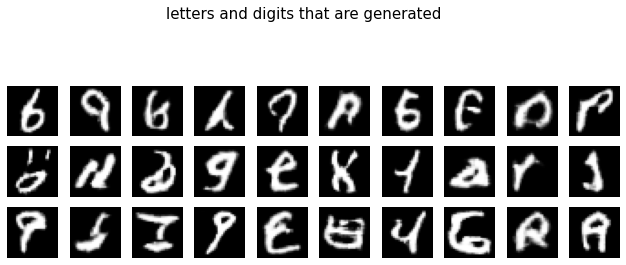

current epouch is:  1
discriminator loss currently is :  0.5909782648086548
generator loss currently is:  1.2227811813354492
--------------------------------------------------------------------------------
current epouch is:  2
discriminator loss currently is :  0.6643404960632324
generator loss currently is:  1.8651432991027832
--------------------------------------------------------------------------------
current epouch is:  3
discriminator loss currently is :  0.5763362646102905
generator loss currently is:  1.0201689004898071
--------------------------------------------------------------------------------
current epouch is:  4
discriminator loss currently is :  0.5721609592437744
generator loss currently is:  1.450558066368103
--------------------------------------------------------------------------------
current epouch is:  5
discriminator loss currently is :  0.5622556209564209
generator loss currently is:  1.2978971004486084
----------------------------------------------------

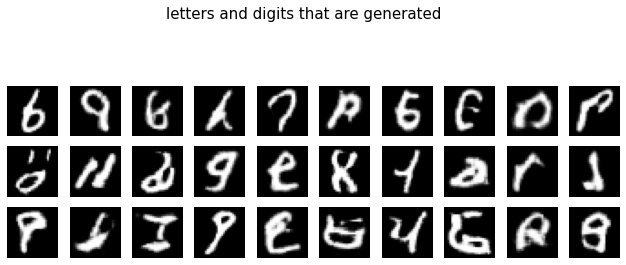

current epouch is:  6
discriminator loss currently is :  0.5671430230140686
generator loss currently is:  1.3145397901535034
--------------------------------------------------------------------------------
current epouch is:  7
discriminator loss currently is :  0.5431832671165466
generator loss currently is:  1.0073251724243164
--------------------------------------------------------------------------------
current epouch is:  8
discriminator loss currently is :  0.5514337420463562
generator loss currently is:  0.9995250701904297
--------------------------------------------------------------------------------
current epouch is:  9
discriminator loss currently is :  0.5601167678833008
generator loss currently is:  1.1120836734771729
--------------------------------------------------------------------------------
current epouch is:  10
discriminator loss currently is :  0.5564140677452087
generator loss currently is:  1.1651663780212402
--------------------------------------------------

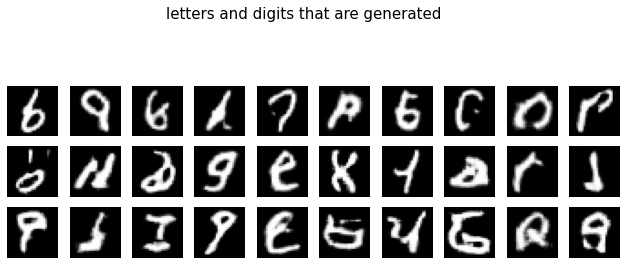

current epouch is:  11
discriminator loss currently is :  0.5573699474334717
generator loss currently is:  1.083612322807312
--------------------------------------------------------------------------------
current epouch is:  12
discriminator loss currently is :  0.6971530318260193
generator loss currently is:  1.5749528408050537
--------------------------------------------------------------------------------
current epouch is:  13
discriminator loss currently is :  0.6076468825340271
generator loss currently is:  1.6349257230758667
--------------------------------------------------------------------------------
current epouch is:  14
discriminator loss currently is :  0.6701744198799133
generator loss currently is:  1.6584116220474243
--------------------------------------------------------------------------------
current epouch is:  15
discriminator loss currently is :  0.5774952173233032
generator loss currently is:  1.4543991088867188
-----------------------------------------------

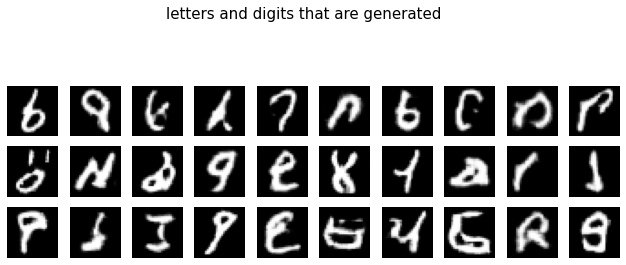

current epouch is:  16
discriminator loss currently is :  0.589874267578125
generator loss currently is:  1.4882967472076416
--------------------------------------------------------------------------------
current epouch is:  17
discriminator loss currently is :  0.5404518246650696
generator loss currently is:  1.4516047239303589
--------------------------------------------------------------------------------
current epouch is:  18
discriminator loss currently is :  0.5342108607292175
generator loss currently is:  1.2347207069396973
--------------------------------------------------------------------------------
current epouch is:  19
discriminator loss currently is :  0.5409172773361206
generator loss currently is:  1.2688230276107788
--------------------------------------------------------------------------------
current epouch is:  20
discriminator loss currently is :  0.5662561058998108
generator loss currently is:  1.6668328046798706
-----------------------------------------------

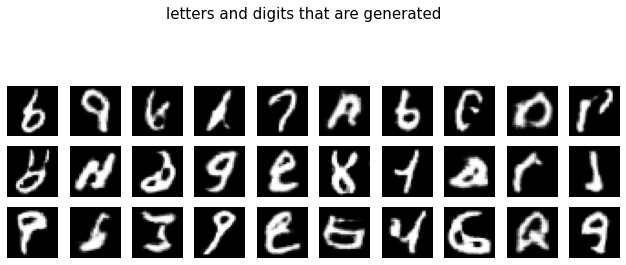

current epouch is:  21
discriminator loss currently is :  0.6590112447738647
generator loss currently is:  1.7961373329162598
--------------------------------------------------------------------------------
current epouch is:  22
discriminator loss currently is :  0.5542410612106323
generator loss currently is:  1.6656177043914795
--------------------------------------------------------------------------------
current epouch is:  23
discriminator loss currently is :  0.6025029420852661
generator loss currently is:  1.4301011562347412
--------------------------------------------------------------------------------
current epouch is:  24
discriminator loss currently is :  0.5300809144973755
generator loss currently is:  1.4443093538284302
--------------------------------------------------------------------------------
current epouch is:  25
discriminator loss currently is :  0.526698112487793
generator loss currently is:  1.1284799575805664
-----------------------------------------------

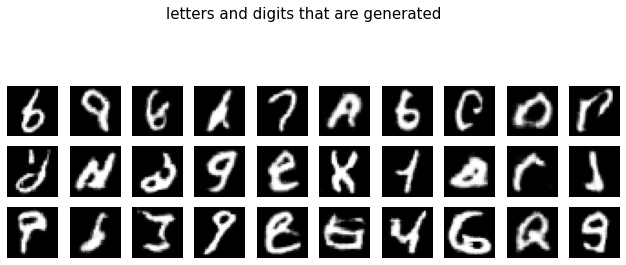

current epouch is:  26
discriminator loss currently is :  0.547473132610321
generator loss currently is:  1.7385704517364502
--------------------------------------------------------------------------------
current epouch is:  27
discriminator loss currently is :  0.5117376446723938
generator loss currently is:  1.3093717098236084
--------------------------------------------------------------------------------
current epouch is:  28
discriminator loss currently is :  0.551205039024353
generator loss currently is:  1.0660593509674072
--------------------------------------------------------------------------------
current epouch is:  29
discriminator loss currently is :  0.5729503631591797
generator loss currently is:  0.8422218561172485
--------------------------------------------------------------------------------
current epouch is:  30
discriminator loss currently is :  0.5561452507972717
generator loss currently is:  1.6757320165634155
------------------------------------------------

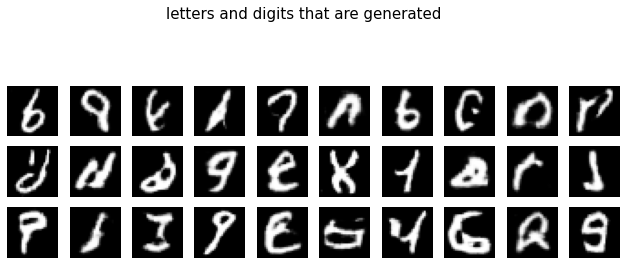

current epouch is:  31
discriminator loss currently is :  0.5097992420196533
generator loss currently is:  1.2301037311553955
--------------------------------------------------------------------------------
current epouch is:  32
discriminator loss currently is :  0.5199950337409973
generator loss currently is:  1.801288366317749
--------------------------------------------------------------------------------
current epouch is:  33
discriminator loss currently is :  0.5042750239372253
generator loss currently is:  1.3046642541885376
--------------------------------------------------------------------------------
current epouch is:  34
discriminator loss currently is :  0.5950738191604614
generator loss currently is:  1.7465039491653442
--------------------------------------------------------------------------------
current epouch is:  35
discriminator loss currently is :  0.5244114398956299
generator loss currently is:  1.6073031425476074
-----------------------------------------------

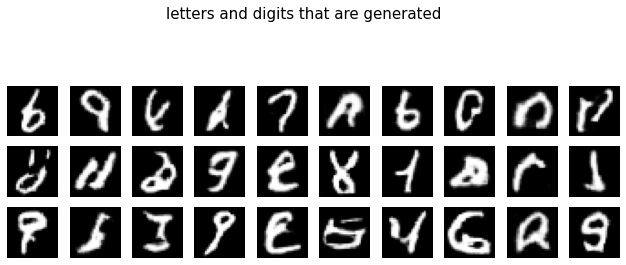

current epouch is:  36
discriminator loss currently is :  0.514089822769165
generator loss currently is:  1.1755874156951904
--------------------------------------------------------------------------------
current epouch is:  37
discriminator loss currently is :  0.5117589235305786
generator loss currently is:  1.591793417930603
--------------------------------------------------------------------------------
current epouch is:  38
discriminator loss currently is :  0.5091708898544312
generator loss currently is:  1.4087951183319092
--------------------------------------------------------------------------------
current epouch is:  39
discriminator loss currently is :  0.51226806640625
generator loss currently is:  1.131772756576538
--------------------------------------------------------------------------------
current epouch is:  40
discriminator loss currently is :  0.5258036851882935
generator loss currently is:  1.34673011302948
-----------------------------------------------------

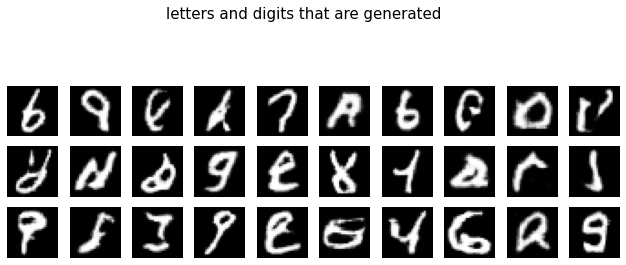

current epouch is:  41
discriminator loss currently is :  0.5660285353660583
generator loss currently is:  2.0355563163757324
--------------------------------------------------------------------------------
current epouch is:  42
discriminator loss currently is :  0.5700560808181763
generator loss currently is:  1.1056149005889893
--------------------------------------------------------------------------------
current epouch is:  43
discriminator loss currently is :  0.5121625065803528
generator loss currently is:  1.829859733581543
--------------------------------------------------------------------------------
current epouch is:  44
discriminator loss currently is :  0.5134284496307373
generator loss currently is:  1.3604732751846313
--------------------------------------------------------------------------------
current epouch is:  45
discriminator loss currently is :  0.5088437795639038
generator loss currently is:  1.427490472793579
------------------------------------------------

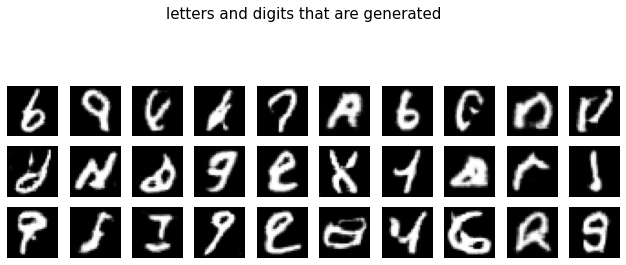

current epouch is:  46
discriminator loss currently is :  0.5556915402412415
generator loss currently is:  0.8687045574188232
--------------------------------------------------------------------------------
current epouch is:  47
discriminator loss currently is :  0.49547824263572693
generator loss currently is:  1.458895206451416
--------------------------------------------------------------------------------
current epouch is:  48
discriminator loss currently is :  0.5157890915870667
generator loss currently is:  1.247328758239746
--------------------------------------------------------------------------------
current epouch is:  49
discriminator loss currently is :  0.5624338984489441
generator loss currently is:  1.782143473625183
--------------------------------------------------------------------------------
current epouch is:  50
discriminator loss currently is :  0.514696478843689
generator loss currently is:  1.647564172744751
--------------------------------------------------

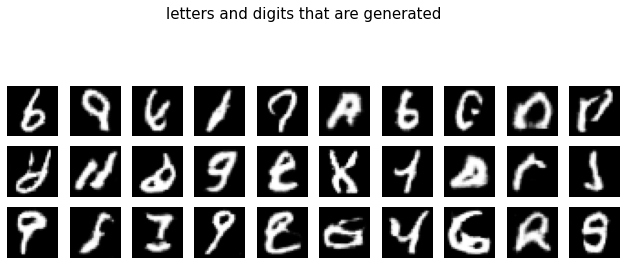

In [26]:
for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        inputgenerator = np.random.normal(0, 1, size=(batch_size, ND))
        fakedataG = G.predict(inputgenerator)
        realdataG = trainingx[np.random.randint(0, trainingx.shape[0], size=batch_size)]
        realdataG = realdataG.reshape((batch_size, 28, 28, 1))
        inputdiscriminator= np.concatenate((realdataG , fakedataG))
        labeldiscriminator = np.zeros(2*batch_size)
        labeldiscriminator[:batch_size] = 0.9
        labeldiscriminator[batch_size:] = 0.1
        lossdiscriminator= D.train_on_batch(inputdiscriminator, labeldiscriminator)
        labelgenerator= np.ones(batch_size)
        lossgenerator = DCGAN.train_on_batch(inputgenerator, labelgenerator)

    print("current epouch is: ", epoch)
    print("discriminator loss currently is : ", lossdiscriminator)
    print("generator loss currently is: ", lossgenerator)
    print("-"*80)
    
    if epoch % 5 == 0:
        show_results("letters and digits that are generated", epoch)